In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from keras.layers import Conv2D, MaxPooling2D
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import img_to_array, load_img 

C:\Users\riaka\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\riaka\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
def load_and_preprocess_data(csv_path, image_dir):
    data = pd.read_csv(csv_path)
    images = []
    labels = []

    encoder = LabelEncoder()
    data['Label'] = encoder.fit_transform(data['Label'])

    for index, row in data.iterrows():
        image_path = os.path.join(image_dir, row['Image Path'])
        image = load_img(image_path, target_size=(224, 224))  
        image = img_to_array(image)
        image = image / 255.0  
        images.append(image)
        labels.append(row['Label'])

    return np.array(images), np.array(labels)


In [3]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

def build_model(input_shape):
    model = Sequential()
    model.add(Conv2D(64,kernel_size=3,activation = 'relu',input_shape=input_shape))
    model.add(MaxPooling2D(4,4))
    model.add(Conv2D(64,kernel_size=3,activation = 'relu'))
    model.add(MaxPooling2D(4,4))
    model.add(Conv2D(64,kernel_size=3,activation = 'relu'))
    model.add(MaxPooling2D(4,4))
    model.add(Flatten())
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [4]:
def train_model(X_train, y_train, epochs=10, batch_size=32):
    model = build_model(X_train.shape[1:])
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)
    return model

In [5]:
def evaluate_model(model, X_test, y_test):
    loss, accuracy = model.evaluate(X_test, y_test)
    print("Test Loss ",loss)
    print("Test Accuracy ",accuracy)

In [6]:
def predict_user_image(model):
    csv_path = r"D:\dataset_images\newnewnew.csv"
    image_dir = r'D:\dataset_images'

    data = pd.read_csv(csv_path)
    images = []

    for index, row in data.iterrows():
        image_path = os.path.join(image_dir, row['Image Path'])
        image = load_img(image_path, target_size=(224, 224))
        image = img_to_array(image)
        image = image / 255.0
        images.append(image)

    predictions = model.predict(np.array(images))

    for i, prediction in enumerate(predictions):
        if prediction >= 0.5:
            print(f"Image {i+1}: Real")
        else:
            print(f"Image {i+1}: Fake")


In [10]:
if __name__ == "__main__":
    csv_path = r"D:\dataset_images\dataset_images_2000_cat.csv"
    image_dir = r'D:\dataset_images'

    images, labels = load_and_preprocess_data(csv_path, image_dir)

    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=64)
    
    evaluate_model(model, X_test, y_test)

Epoch 1/15
25/25 [==============================] - 45s 1s/step - loss: 0.0678 - accuracy: 0.9731 - val_loss: 0.1209 - val_accuracy: 0.9450
Epoch 2/15
25/25 [==============================] - 33s 1s/step - loss: 0.0603 - accuracy: 0.9769 - val_loss: 0.1011 - val_accuracy: 0.9525
Epoch 3/15
25/25 [==============================] - 32s 1s/step - loss: 0.0544 - accuracy: 0.9812 - val_loss: 0.0938 - val_accuracy: 0.9650
Epoch 4/15
25/25 [==============================] - 32s 1s/step - loss: 0.0509 - accuracy: 0.9819 - val_loss: 0.0948 - val_accuracy: 0.9625
Epoch 5/15
25/25 [==============================] - 33s 1s/step - loss: 0.0499 - accuracy: 0.9800 - val_loss: 0.0848 - val_accuracy: 0.9675
Epoch 6/15
25/25 [==============================] - 32s 1s/step - loss: 0.0502 - accuracy: 0.9806 - val_loss: 0.0840 - val_accuracy: 0.9675
Epoch 7/15
25/25 [==============================] - 32s 1s/step - loss: 0.0435 - accuracy: 0.9856 - val_loss: 0.0718 - val_accuracy: 0.9700
Epoch 8/15
25/25 [==

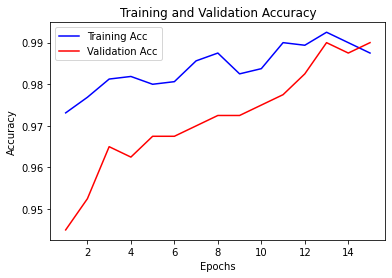

In [11]:
import matplotlib.pyplot as plt

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'b', label='Training Acc')
plt.plot(epochs, val_acc, 'r', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

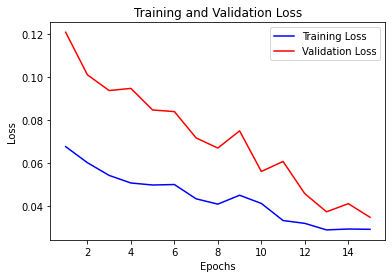

In [12]:
import matplotlib.pyplot as plt

train_acc = history.history['loss']
val_acc = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'b', label='Training Loss')
plt.plot(epochs, val_acc, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
predict_user_image(model)

2/2 [==============================] - 0s 44ms/step
Image 1: Real
Image 2: Real
Image 3: Real
Image 4: Real
Image 5: Real
Image 6: Real
Image 7: Real
Image 8: Real
Image 9: Real
Image 10: Real
Image 11: Real
Image 12: Real
Image 13: Real
Image 14: Real
Image 15: Real
Image 16: Real
Image 17: Real
Image 18: Real
Image 19: Real
Image 20: Fake
Image 21: Fake
Image 22: Fake
Image 23: Fake
Image 24: Fake
Image 25: Fake
Image 26: Fake
Image 27: Fake
Image 28: Fake
Image 29: Fake
Image 30: Fake
Image 31: Fake
Image 32: Fake
Image 33: Fake
Image 34: Fake
Image 35: Fake
Image 36: Fake
Image 37: Fake
Image 38: Fake
Image 39: Fake
Image 40: Fake
